Some imports:

In [133]:
import numpy as np
import matplotlib as mpl
plt = mpl.pyplot

So first we wanna implement Euler's Method. Probably best way is to use python functions for the derivatives (as opposed to SymPy expressions or whatever).

This is an ideal case for Python generators, if we need an arbitary number of just-in-time points; but for producing a matplotlib picture, we want to make an array.

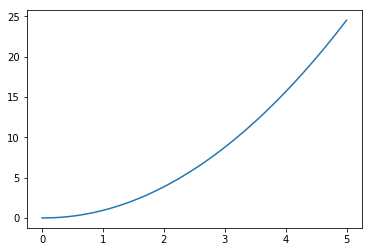

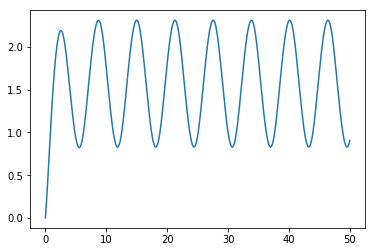

In [134]:
# In one dimension; dx/dt = f(x,t)

def Eulers1(dxdt, x0, t0=0, tf=1, n=100):
    
    dt = (tf-t0)/n
    T = np.linspace(t0,tf,num=n)
    X = np.zeros(n)
    x = x0
       
    for i,t in enumerate(T):
        X[i] = x
        x +=  dt * dxdt(x, t)
    
    return T, X #in the right order for use in pyplot

plt.plot(*Eulers1(lambda x, t : 2 * t, 0, 0,5))
plt.show()
plt.plot(*Eulers1(lambda x, t : np.cos(x)+np.sin(t), 0, 0,50,1000))
plt.show()

In [135]:
# In two dimensions
# Want to be able to produce either a plot of x, y vs t or a phase portrait of x vs y
# dxdt = f(x, y, t), dydt = g(x, y, t)

def Eulers2(dxdt, dydt, x0, y0, t0 = 0, tf = 1, n = 1000, output = "TXY"):
    '''returns a tuple containing some or all of X, Y, and T, in the combination and order specified
    in "output". E.g., output = XYTXY -> return (X, Y, T, X, Y)
    Output = XY'''
    
    dt = (tf-t0)/n
    T = np.linspace(t0,tf,num=n)
    X, Y = np.zeros(n), np.zeros(n)
    x, y = x0, y0
    
    for i,t in enumerate(T):
        X[i], Y[i] = x, y
        x +=  dt * dxdt(x, y, t)
        y +=  dt * dydt(x, y, t)
        
    XYT = {"X":X, "Y":Y, "T":T}
    return tuple(XYT[c] for c in output)

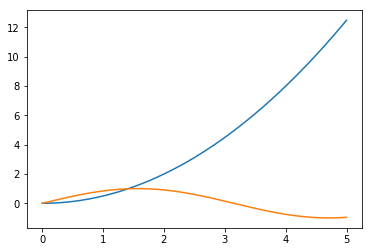

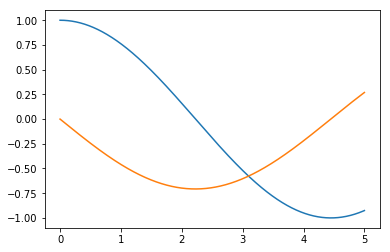

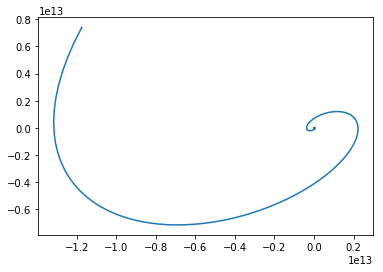

In [136]:
plt.plot(*Eulers2(lambda x, y, t: t,
                 lambda x, y, t: np.cos(t),
                  0,0,0,5,1000,"TXTY"))
plt.show()

plt.plot(*Eulers2(lambda x, y, t: y,
                 lambda x, y, t: -x/2,
                  1,0,0,5,1000,"TXTY"))
plt.show()

import math
plt.plot(*Eulers2(lambda x, y, t: y,
                 lambda x, y, t: -x+y,
                  1,0,0,20*math.pi,1000,"XY"))
plt.show()

Okay, so those are some basic Euler's method functions.

Now let's look at the SIR model,
\begin{equation}
\newcommand{\ddt}[1]{\frac{\mathrm{d}#1}{\mathrm{d}t}}
\ddt{I} = \beta S I - \gamma I,\quad
\ddt{S} = -\beta SI .
\end{equation}

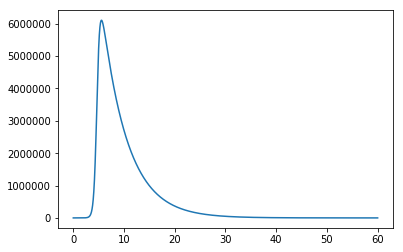

In [137]:
# Independent Parameters

rn = 18      # reproduction number rn = beta * N / gamma
N = 7800000  # Total population, N = S + I + R
gamma = 1/5  # mean infectious period 1/gamma = 5 days
I0 = 1


# Computed Parameters

S0 = N - I0
beta = rn * gamma / N


# Differential Equations
dIdt = lambda I, S, t :  (beta * S - gamma) * I
dSdt = lambda I, S, t :  -beta * S * I


plt.plot(*Eulers2(dIdt, dSdt, I0, S0, 0, 60, 100000, "TX"))
plt.show()


Too much of a peak; our initial conditions are ridiculous. Let's try again.

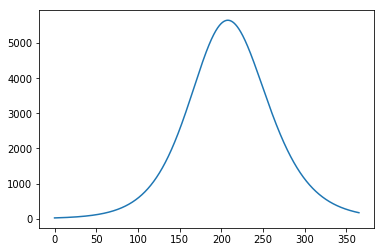

In [138]:
# Independent Parameters
I0 = 123 * 5/30
S0 = 0.065 * N

plt.plot(*Eulers2(dIdt, dSdt, I0, S0, 0, 365, 36500, "TX"))
plt.show()

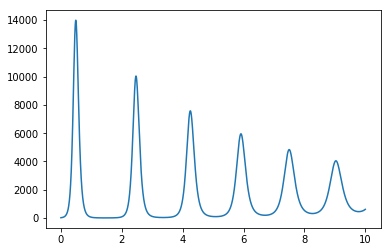

In [139]:
# With birth rate mu and constant population (i.e death rate mu)
# Note that *all* newborns are susceptible, so B = mu * N is the new term in dS/dt

# Here we also change the timescale to years
mu = 1/65
B = mu * N
gamma *= 365
beta *= 365


# Differential Equations
dIdt = lambda I, S, t :  (beta * S - gamma - mu) * I
dSdt = lambda I, S, t :  -(beta * I + mu) * S + B


plt.plot(*Eulers2(dIdt, dSdt, I0, S0, 0, 10, 36500, "TX"))
plt.show()

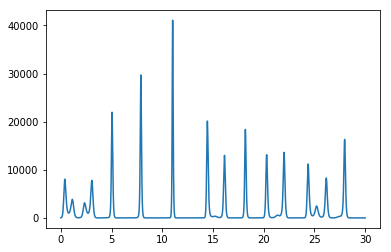

In [145]:
# Seasonal Forcing
alpha = .1

from math import pi
beta_forced = lambda t: beta * (1 + alpha * np.cos(2 * pi * t))

dIdt = lambda I, S, t :  (beta_forced(t) * S - gamma - mu) * I
dSdt = lambda I, S, t :  -(beta_forced(t) * I + mu) * S + B

plt.plot(*Eulers2(dIdt, dSdt, I0, S0, 0, 30, 12000, "TX"))
plt.show()
